In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [2]:
train_data = pd.read_csv('../../Data/preprocessed2-train-bank-data.csv', sep=';')
test_data = pd.read_csv('../../Data/preprocessed2-test-bank-data.csv', sep=';')

train_data.head()

,age,campaign,contacted.in.previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos,y
0,0.322632,1.000000,0.0,1.000000,0.612813,0.390735,0.970664,1.000000,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,-0.500000,-0.866025,-5.877853e-01,-0.809017,0.0
1,0.552137,0.000000,0.0,1.000000,0.422695,0.724448,0.970664,1.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.866025,-0.500000,-9.510565e-01,0.309017,0.0
2,0.636314,0.495659,0.0,0.854914,0.644951,0.710269,0.932652,0.710922,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.500000,-0.866025,-2.449294e-16,1.000000,0.0
3,0.798640,0.000000,0.0,0.432174,0.331438,0.428275,0.714556,0.743803,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-0.500000,0.866025,9.510565e-01,0.309017,0.0
4,0.552137,0.495659,0.0,1.000000,0.612813,0.390735,0.970309,1.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.500000,-0.866025,-9.510565e-01,0.309017,0.0


In [3]:
X_train, y_train = train_data.drop('y', axis=1), train_data['y']
X_test, y_test = test_data.drop('y', axis=1), test_data['y']

# Building Logistic Regression model

It will be our baseline model to compare result with other ones

In [4]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

c:\Users\frane\anaconda3\envs\kaggleproject\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7105
         1.0       0.67      0.23      0.34       870

    accuracy                           0.90      7975
   macro avg       0.79      0.61      0.64      7975
weighted avg       0.89      0.90      0.88      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     28211
         1.0       0.67      0.22      0.33      3617

    accuracy                           0.90     31828
   macro avg       0.79      0.60      0.64     31828
weighted avg       0.88      0.90      0.87     31828



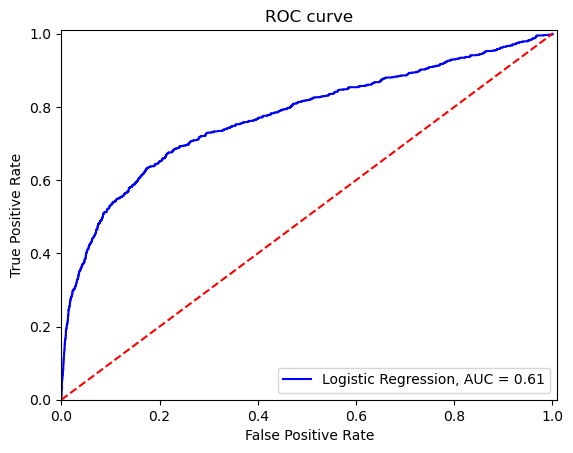

In [5]:
print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, logr.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, logr.predict(X_train))}")

roc_auc = roc_auc_score(y_test, logr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {round(roc_auc, 2)}', color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In our case, we would like to improve recall. We will handle imbalanced target value, by setting class_weight to 'balanced', so that the model is more sensitive (more likely to predict 1).

In [6]:
logr2 = LogisticRegression(class_weight='balanced')
logr2.fit(X_train, y_train)

c:\Users\frane\anaconda3\envs\kaggleproject\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced')

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      7105
         1.0       0.28      0.66      0.39       870

    accuracy                           0.78      7975
   macro avg       0.61      0.72      0.63      7975
weighted avg       0.88      0.78      0.81      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86     28211
         1.0       0.29      0.66      0.40      3617

    accuracy                           0.78     31828
   macro avg       0.62      0.73      0.63     31828
weighted avg       0.87      0.78      0.81     31828



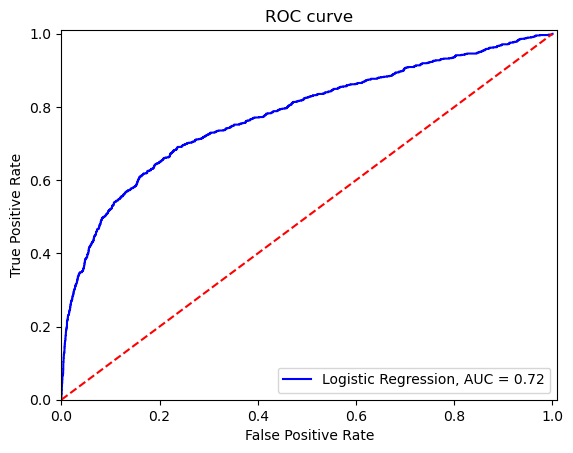

In [7]:
print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, logr2.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, logr2.predict(X_train))}")

roc_auc = roc_auc_score(y_test, logr2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logr2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {round(roc_auc, 2)}', color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Comparison of ROC curves 

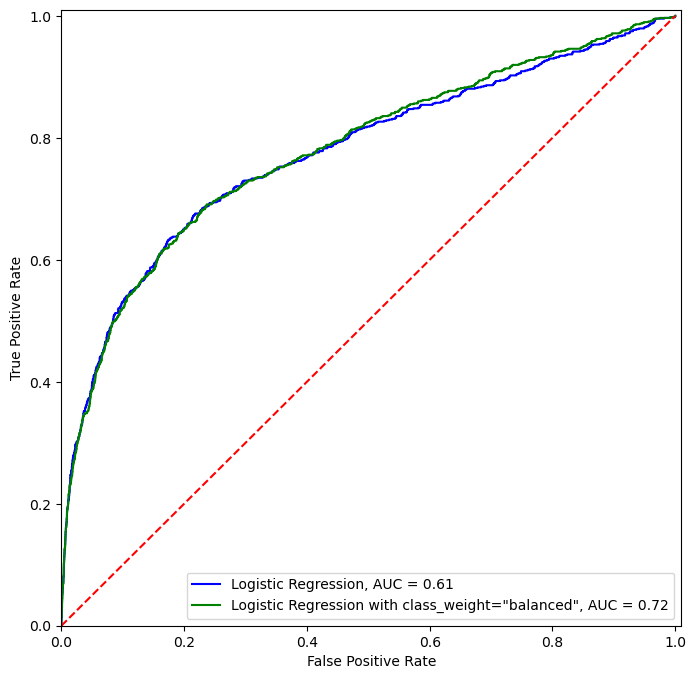

In [8]:
roc_auc1 = roc_auc_score(y_test, logr.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, logr.predict_proba(X_test)[:,1])
roc_auc2 = roc_auc_score(y_test, logr2.predict(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, logr2.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label=f'Logistic Regression, AUC = {round(roc_auc1, 2)}', color='b')
plt.plot(fpr2, tpr2, label=f'Logistic Regression with class_weight="balanced", AUC = {round(roc_auc2, 2)}', color='g')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()